Instructions: Have all the code for all the questions in one Jupyter notebook and upload the file at the time of submission. I will only consider this file format for grading. So, after you uploaded the file, check the file extension and if it is not an ipynb, then upload the right file.

Consider student_performance dataset.

Details about the dataset:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Do the following:

1) Find out the features that are important.

2) Convert categorical features to numeric.

2) Use important features to build the following:

a) Apply SVM along with GridSearchCV to determine the best parameters 
for kernel and C. Use the best parameters from the search and build an SVC model and compute confusion matrix, classification report and accuracy.

b) Likewise, use GridSearchCV to find the best number of trees for Random Forest and then build Random Forest Classifier and compute confusion matrix, classification report and accuracy.

Also read about RandomSearchCV.  And explain the difference between RandomSearchCV and GridSearchCV.


From [Cortez and Silva, 2008]http://www3.dsi.uminho.pt/pcortez/student.pdf
"""
The results show that a good predictive accuracy
can be achieved, provided that the first and/or second
school period grades are available. Although student
achievement is highly influenced by past evaluations, an
explanatory analysis has shown that there are also other
relevant features (e.g. number of absences, parent’s job
and education, alcohol consumption
"""

In [100]:
import pandas as pd
import numpy as np

In [101]:
np.random.seed(42)

## Read in dataset

In [102]:
mat_df = pd.read_csv('student_dataset/student-mat.csv', sep=';')

In [103]:
por_df = pd.read_csv('student_dataset/student-por.csv', sep=';')

In [104]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [105]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [106]:
mat_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [107]:
por_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [108]:
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [109]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Merge

In [110]:
# student_df = mat_df.merge(por_df, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [111]:
# student_df.info()

# 1) Find out the features that are important.

## Use extra trees classifier method

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.compose import make_column_selector as col_selector
from sklearn.ensemble import ExtraTreesClassifier

### split into features and target

In [113]:
mat_df_x = mat_df.drop('G3', axis=1).copy(deep=True)
mat_y = mat_df['G3'].copy(deep=True)

por_df_x = por_df.drop('G3', axis=1).copy(deep=True)
por_y = por_df['G3'].copy(deep=True)

# 2) Convert categorical features to numeric.

### Convert Categorical Features to Numeric in order to use the ExtraTreesClassifier

In [114]:
categorical_cols_obj = col_selector(dtype_include=object)
categorical_features_mat = categorical_cols_obj(mat_df_x)
print(categorical_features_mat)

int_cols_obj = col_selector(dtype_include="int64")
numeric_features_mat = int_cols_obj(mat_df_x)
print(numeric_features_mat)

df_cat = mat_df_x[categorical_features_mat]

ob_encoded = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoded.fit_transform(df_cat)

x_mat = np.hstack([cat_encoded, np.array(mat_df_x[numeric_features_mat])])

yb = preprocessing.LabelEncoder()
y_mat = yb.fit_transform(mat_y)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [115]:
categorical_cols_obj = col_selector(dtype_include=object)
categorical_features_por = categorical_cols_obj(por_df_x)
print(categorical_features_por)

int_cols_obj = col_selector(dtype_include="int64")
numeric_features_por = int_cols_obj(por_df_x)
print(numeric_features_por)

df_cat = por_df_x[categorical_features_por]

ob_encoded = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoded.fit_transform(df_cat)

x_por = np.hstack([cat_encoded, np.array(por_df_x[numeric_features_por])])

yb = preprocessing.LabelEncoder()
y_por = yb.fit_transform(por_y)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [116]:
x_mat.shape

(395, 32)

In [117]:
type(x_mat)

numpy.ndarray

In [118]:
pd.DataFrame(x_mat)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,...,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0
2,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,...,3.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0
3,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,...,0.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0
4,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,...,2.0,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0
391,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0,...,0.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0
392,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0,0.0,...,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0
393,1.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,...,0.0,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0


In [119]:
y_mat.shape

(395,)

In [120]:
type(y_mat)

numpy.ndarray

In [121]:
x_por.shape

(649, 32)

In [122]:
y_por.shape

(649,)

### feature importance

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


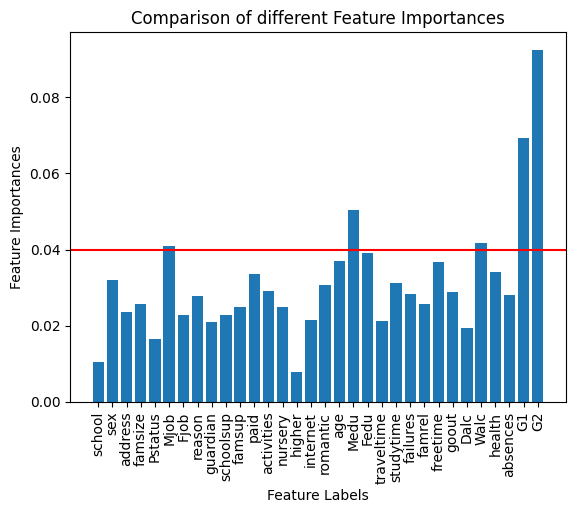

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


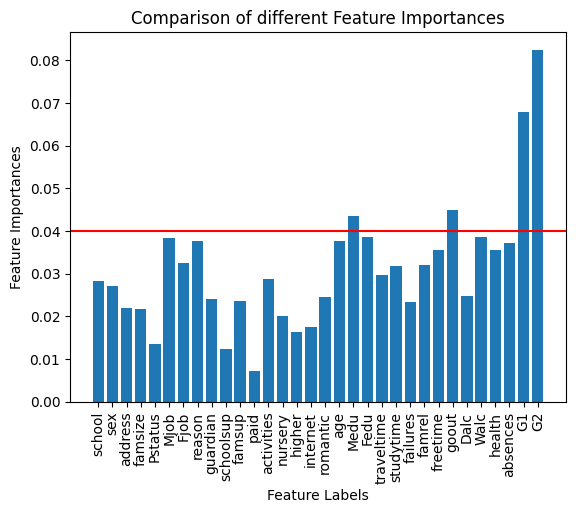

In [123]:
for X, y, cat_features, numeric_features in zip([x_mat, x_por], [y_mat, y_por], [categorical_features_mat, categorical_features_por], [numeric_features_mat, numeric_features_por]):
    extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)

    # Training the model
    extra_tree_forest.fit(X, y)

    # Computing the importance of each feature
    feature_importance = extra_tree_forest.feature_importances_

    # Plotting a Bar Graph to compare the models
    features = cat_features + numeric_features
    print(features)
    plt.bar(features, feature_importance) 
    plt.xlabel('Feature Labels')
    plt.xticks(rotation=90)
    plt.ylabel('Feature Importances')
    plt.axhline(y=0.04, color='r')
    plt.title('Comparison of different Feature Importances')
    plt.show()

## Feature Selection

The most important features by far are G1 and G2 for both math and portuguese datasets
I will also consider these other features significant based on if they are around or greater than a threshold of 0.035 feature importance (I will look at both datasets and use the same set of features for both for now):
- Mjob
- reason
- age
- Medu
- Fedu
- freetime
- Walc
- health
- absences
- G1
- G2

### Note: We could also run the extra tree classifier again to pull the important features from this first filtered list

# 3) Use important features to build the following:

# a) Apply SVM along with GridSearchCV to determine the best parameters 
# for kernel and C. Use the best parameters from the search and build an SVC model and compute confusion matrix, classification report and accuracy.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

## separate best features and encode

In [125]:
mat_df_x_copy = mat_df_x.copy(deep=True)
por_df_x_copy = por_df_x.copy(deep=True)

selected_features = ['Mjob', 'Medu', 'Fedu', 'goout', 'freetime', 'Walc', 'G1', 'G2']

mat_df_x_copy = mat_df_x_copy[selected_features]
por_df_x_copy = por_df_x_copy[selected_features]

In [126]:
categorical_cols_obj = col_selector(dtype_include=object)
categorical_features_mat = categorical_cols_obj(mat_df_x_copy)
print(categorical_features_mat)

int_cols_obj = col_selector(dtype_include="int64")
numeric_features_mat = int_cols_obj(mat_df_x_copy)
print(numeric_features_mat)

df_cat = mat_df_x_copy[categorical_features_mat]

ob_encoded = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoded.fit_transform(df_cat)

x_mat = np.hstack([cat_encoded, np.array(mat_df_x_copy[numeric_features_mat])])

yb = preprocessing.LabelEncoder()
y_mat = yb.fit_transform(mat_y)

['Mjob']
['Medu', 'Fedu', 'goout', 'freetime', 'Walc', 'G1', 'G2']


In [127]:
categorical_cols_obj = col_selector(dtype_include=object)
categorical_features_por = categorical_cols_obj(por_df_x_copy)
print(categorical_features_por)

int_cols_obj = col_selector(dtype_include="int64")
numeric_features_por = int_cols_obj(por_df_x_copy)
print(numeric_features_por)

df_cat = por_df_x_copy[categorical_features_por]

ob_encoded = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoded.fit_transform(df_cat)

x_por = np.hstack([cat_encoded, np.array(por_df_x_copy[numeric_features_por])])

yb = preprocessing.LabelEncoder()
y_por = yb.fit_transform(por_y)

['Mjob']
['Medu', 'Fedu', 'goout', 'freetime', 'Walc', 'G1', 'G2']


### Train Test Split

In [128]:
xmat_train, xmat_test, ymat_train, ymat_test = train_test_split(x_mat, y_mat, test_size = 0.20)

In [129]:
xpor_train, xpor_test, ypor_train, ypor_test = train_test_split(x_por, y_por, test_size = 0.20)

### Instantiate SVM and train

#### Math

In [130]:
svclassifier = SVC(kernel='linear') # creating an object
svclassifier.fit(xmat_train, ymat_train) # fiting the data to the model

ymat_pred = svclassifier.predict(xmat_test)

print("Confusion Matrix")
print(confusion_matrix(ymat_test, ymat_pred))
print("Classification Report")
print(classification_report(ymat_test, ymat_pred))
print("Accuracy:", metrics.accuracy_score(ymat_test, ymat_pred))

Confusion Matrix
[[7 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 4 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 0 5 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 6 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      0.64      0.44        11
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.57      0.33      0.42        12
           6       0.40      0.67      0.50         3
           7       0.

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

#### Portuguese

In [131]:
svclassifier = SVC(kernel='linear') # creating an object
svclassifier.fit(xpor_train, ypor_train) # fiting the data to the model

ypor_pred = svclassifier.predict(xpor_test)

print("Confusion Matrix")
print(confusion_matrix(ypor_test, ypor_pred))
print("Classification Report")
print(classification_report(ypor_test, ypor_pred))
print("Accuracy:", metrics.accuracy_score(ypor_test, ypor_pred))

Confusion Matrix
[[ 1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1 11  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  6  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  5  2  3  0  0  0]
 [ 0  0  0  0  0  0  1  0  2  8  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  2  0]
 [ 0  0  0  0  0  0  0  0  1  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         0
           5       0.43      0.38      0.40         8
           6       0.33      0.33      0.33         3
           7       0.58      0.48      0.52        23
           8       0.59      0.74      0.66        31
           9       0.50      0.33  

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramete

## Use GridSearchCV

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1, 5, 10]}

In [134]:
# Math
svc = SVC()
clf = GridSearchCV(svc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)

final_clf = clf.fit(xmat_train, ymat_train)
print(sorted(final_clf.cv_results_.keys()))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [135]:
print(final_clf.best_estimator_)
print(final_clf.best_params_)

SVC(C=5, kernel='poly')
{'C': 5, 'kernel': 'poly'}


In [136]:
# Portuguese
svc = SVC()
clf = GridSearchCV(svc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)

final_clf = clf.fit(xpor_train, ypor_train)
print(sorted(final_clf.cv_results_.keys()))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [137]:
print(final_clf.best_estimator_)
print(final_clf.best_params_)

SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


## Best parameters for Math are C=1 and Kernel=linear
## Best parameters for Portuguese are C=5 and Kernel=poly

# Create the SVM with the best parameters

### Math

In [138]:
svclassifier = SVC(kernel='linear', C=1) # creating an object
svclassifier.fit(xmat_train, ymat_train) # fiting the data to the model

ymat_pred = svclassifier.predict(xmat_test)

print("Confusion Matrix")
print(confusion_matrix(ymat_test, ymat_pred))
print("Classification Report")
print(classification_report(ymat_test, ymat_pred))
print("Accuracy:", metrics.accuracy_score(ymat_test, ymat_pred))

Confusion Matrix
[[7 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 4 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 0 5 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 6 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      0.64      0.44        11
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.57      0.33      0.42        12
           6       0.40      0.67      0.50         3
           7       0.

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

### Portuguese

In [139]:
svclassifier = SVC(kernel='poly', C=5) # creating an object
svclassifier.fit(xpor_train, ypor_train) # fiting the data to the model

ypor_pred = svclassifier.predict(xpor_test)

print("Confusion Matrix")
print(confusion_matrix(ypor_test, ypor_pred))
print("Classification Report")
print(classification_report(ypor_test, ypor_pred))
print("Accuracy:", metrics.accuracy_score(ypor_test, ypor_pred))

Confusion Matrix
[[ 1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1 11  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  9 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  5  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  5  2  2  1  0  0]
 [ 0  0  0  0  0  0  1  0  3  7  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  2  0]
 [ 0  0  0  0  0  0  0  0  0  2  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1]]
Classification Report
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         0
           5       0.43      0.38      0.40         8
           6       0.33      0.33      0.33         3
           7       0.55      0.48      0.51        23
           8       0.58      0.71      0.64        31
           9       0.44      0.33  

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramete

## Math accuracy stayed the same (53%) while Portuguese improved quite a bit (39% to 48%)
### Next step could be to try different feature selection and repeat the GridSearchCV steps

# b) Likewise, use GridSearchCV to find the best number of trees for Random Forest and then build Random Forest Classifier and compute confusion matrix, classification report and accuracy.

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [141]:
# The number of trees
parameters = {'n_estimators': [100, 200, 300, 500, 1000]}

### Math

In [142]:
rfc = RandomForestClassifier(random_state=42)

In [143]:
clf = GridSearchCV(rfc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)

final_clf = clf.fit(xmat_train, ymat_train)
print(sorted(final_clf.cv_results_.keys()))
print(final_clf.best_estimator_)
print(final_clf.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
RandomForestClassifier(n_estimators=1000, random_state=42)
{'n_estimators': 1000}


### Portuguese

In [144]:
rfc = RandomForestClassifier(random_state=42)

In [145]:
clf = GridSearchCV(rfc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)

final_clf = clf.fit(xpor_train, ypor_train)
print(sorted(final_clf.cv_results_.keys()))
print(final_clf.best_estimator_)
print(final_clf.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
RandomForestClassifier(n_estimators=1000, random_state=42)
{'n_estimators': 1000}


## Best Random Forest number of trees for Math is 500
## Best Random Forest number of trees for Portuguese is 300

# Create the Random Forest with the best parameters

### Math

In [146]:
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(xmat_train, ymat_train)
rfc_predict = rfc.predict(xmat_test)   
cm_rf = confusion_matrix(ymat_test, rfc_predict)

print(cm_rf)
print(classification_report(ymat_test, rfc_predict))
print("Accuracy for random forest:", accuracy_score(ymat_test,rfc_predict)*100)   

[[4 0 2 0 2 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 0 1 0 5 1 3 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 6 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 3 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.36      0.35        11
           2       0.00      0.00      0.00         2
           3       0.20      0.20      0.20         5
           4       0.00      0.00      0.00         2
           5       0.56      0.42      0.48        12
           6       0.33      0.33      0.33         3
           7       0.40      0.55      0.46        11
      

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

### Portuguese

In [147]:
rfc = RandomForestClassifier(n_estimators=300, random_state=42)
rfc.fit(xpor_train, ypor_train)
rfc_predict = rfc.predict(xpor_test)   
cm_rf = confusion_matrix(ypor_test, rfc_predict)

print(cm_rf)
print(classification_report(ypor_test, rfc_predict))
print("Accuracy for random forest:", accuracy_score(ypor_test,rfc_predict)*100)   

[[ 1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  1  1  2  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 13  9  0  0  0  0  0  0  0]
 [ 0  0  0  0 12 18  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  1  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  6  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  3  3  1  0  0]
 [ 0  0  0  0  0  0  1  1  3  5  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         0
           5       0.33      0.12      0.18         8
           6       0.33      0.33      0.33         3
           7       0.46      0.57      0.51        23
           8       0.58      0.58      0.58        31
           9       0.20      0.08      0.12        12
          10       0

/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramete

## Observations

- The RF model for math performed worse than the SVM with accuracy of 43.0% compared to 53%
- The RF model for portuguese slightly better compared to the SVM with accuracy of 49.2% and about 48% respectively

## Considerations
- To improve the SVM and Random Forest Classifier, I would try to play with feature selection, look at feature correlations, and maybe combine features
- perhaps this would be a good opportunity to use PCA

# Also read about RandomSearchCV.  And explain the difference between RandomSearchCV and GridSearchCV.

## RandomSearchCV is a randomized search on hyper parameters while GridSearchCV is an exhaustive search over specified parameter values according to the documentation

### RandomSearchCV does not try out all parameter values. A fixed number of parameter settings is sampled for distributions specified by the user

### My understanding is that RandomSearchCV is advantageous in that requires less computation and is faster compared to GridSearchCV
### If you have a large set of parameters, then RandomSearchCV is likely better
### If possible, it would be good to use both and see how they compare